# Cancer types prediction

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
df = pd.read_csv('./Cancer_Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Exploratory data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df.drop(["Unnamed: 32", "id"], axis=1, inplace=True)

In [11]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [17]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

target = ['diagnosis']

<AxesSubplot: >

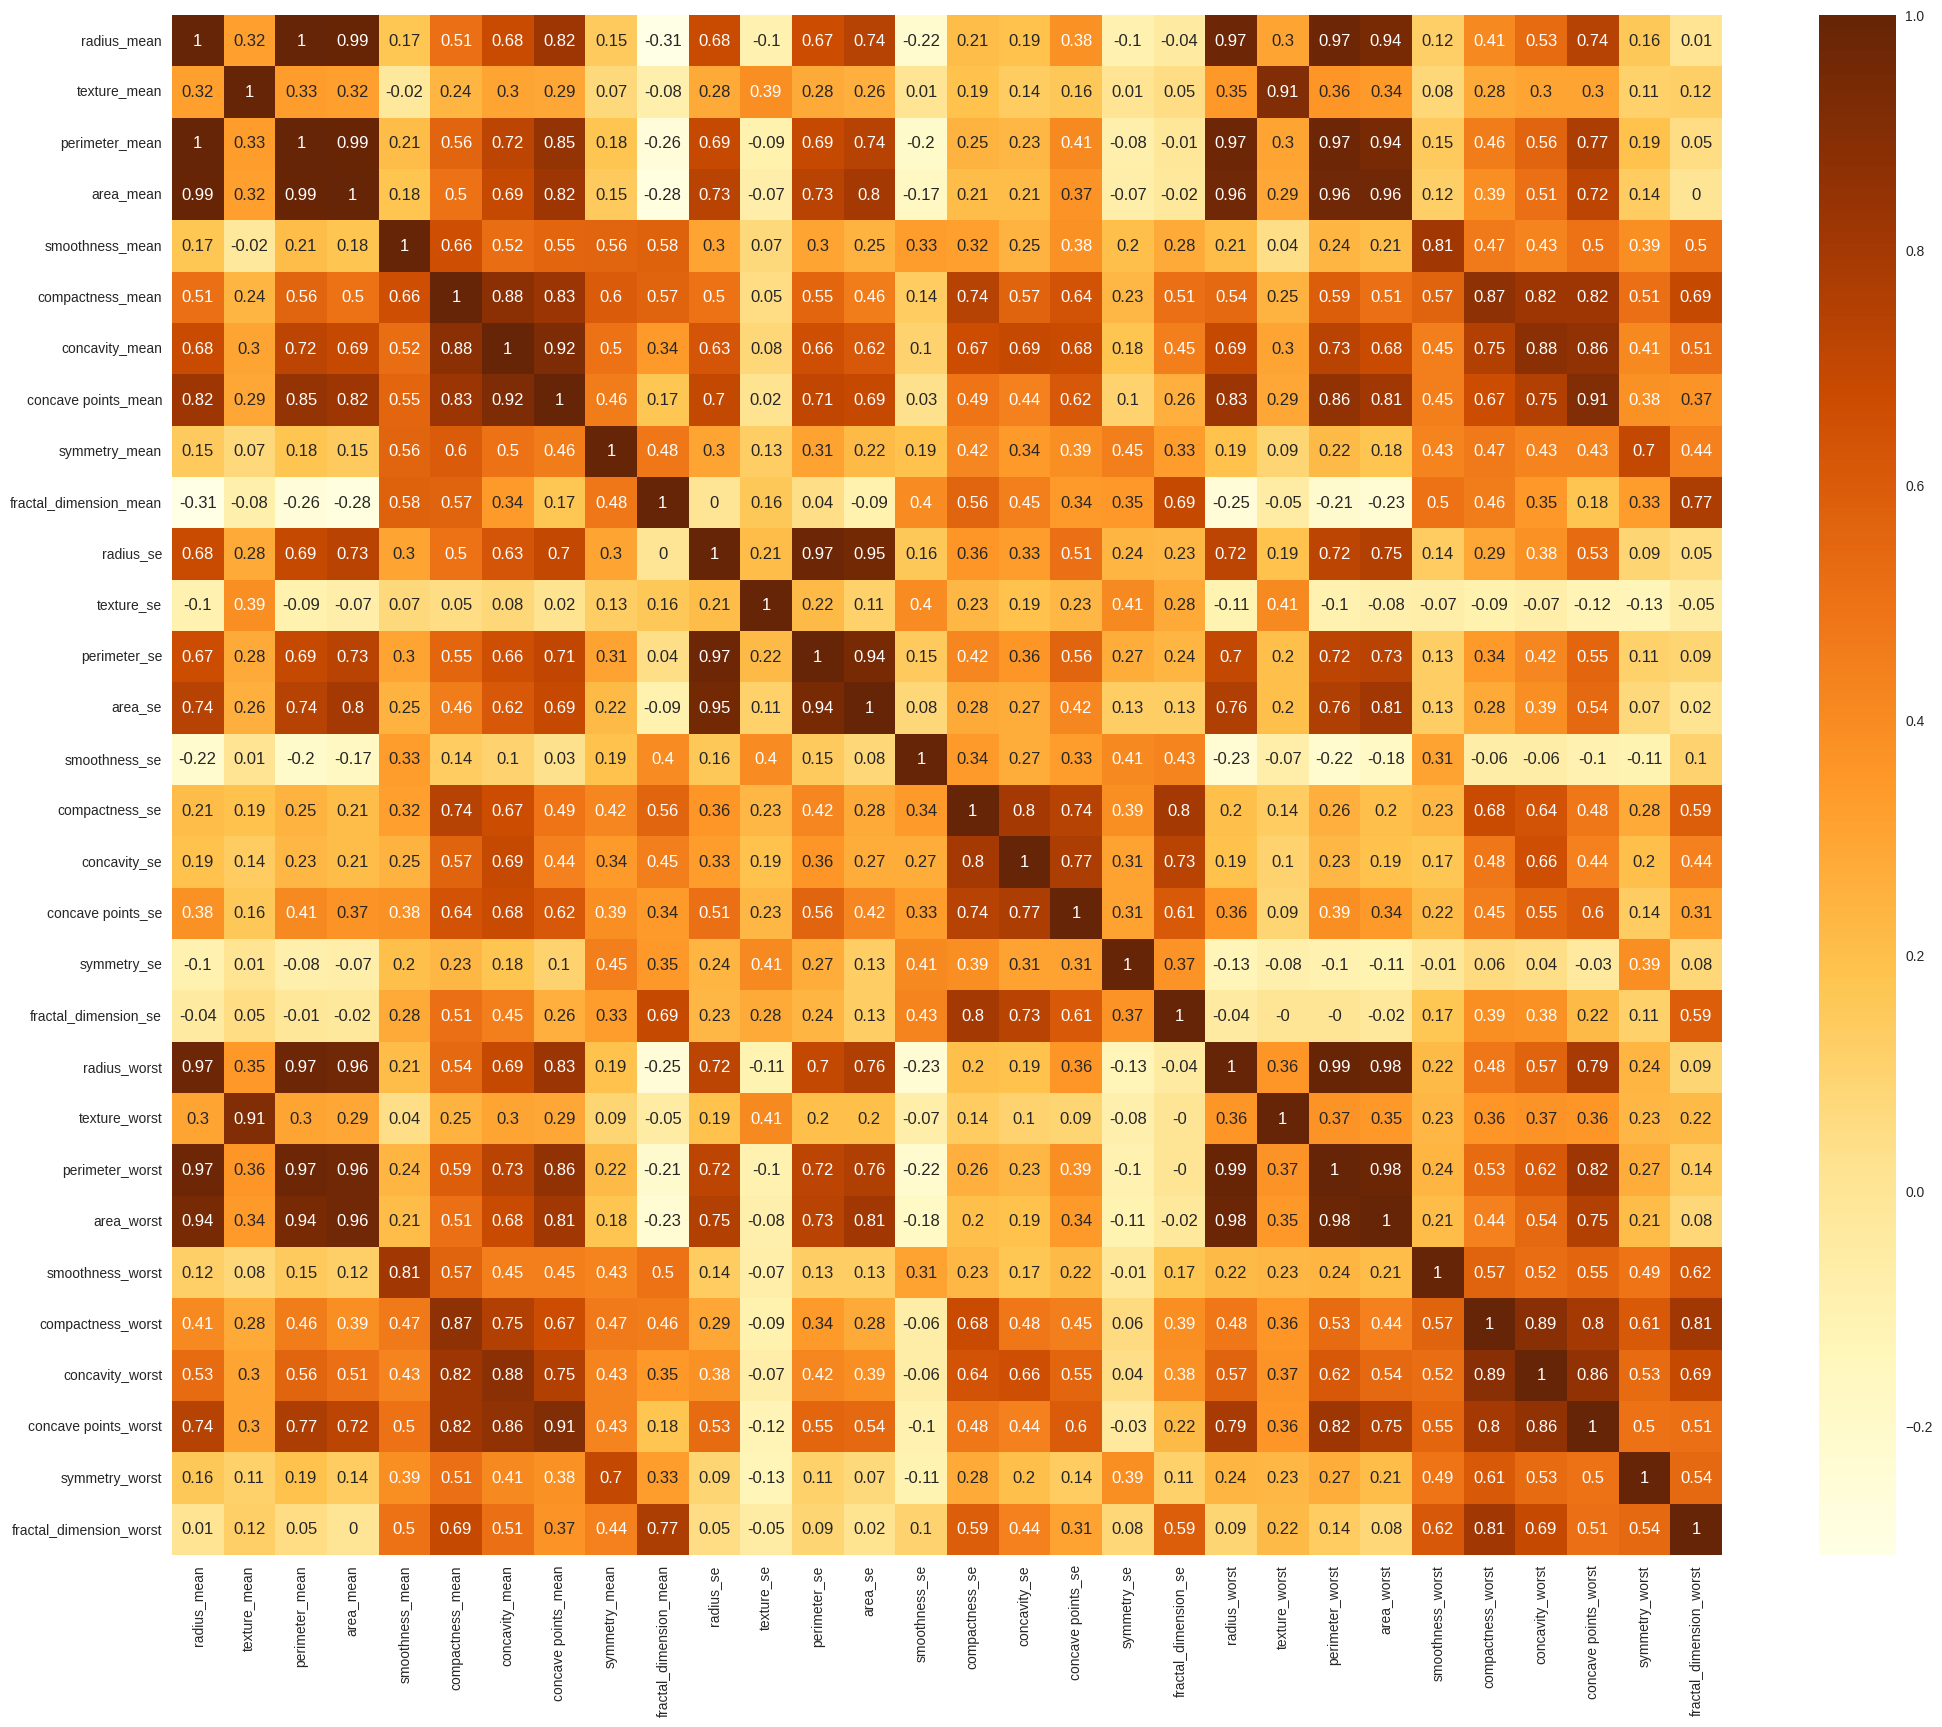

In [19]:
corr = df[features].corr().round(2)
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

<AxesSubplot: title={'center': 'Variable diagnosis'}, xlabel='diagnosis', ylabel='count'>

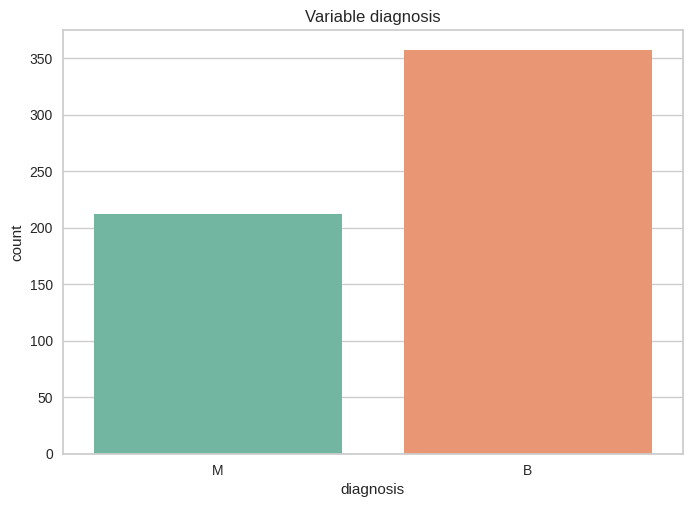

In [20]:
plt.gca().set_title('Variable diagnosis')
sns.countplot(x = 'diagnosis', palette = 'Set2', data = df)

<AxesSubplot: xlabel='fractal_dimension_mean', ylabel='Count'>

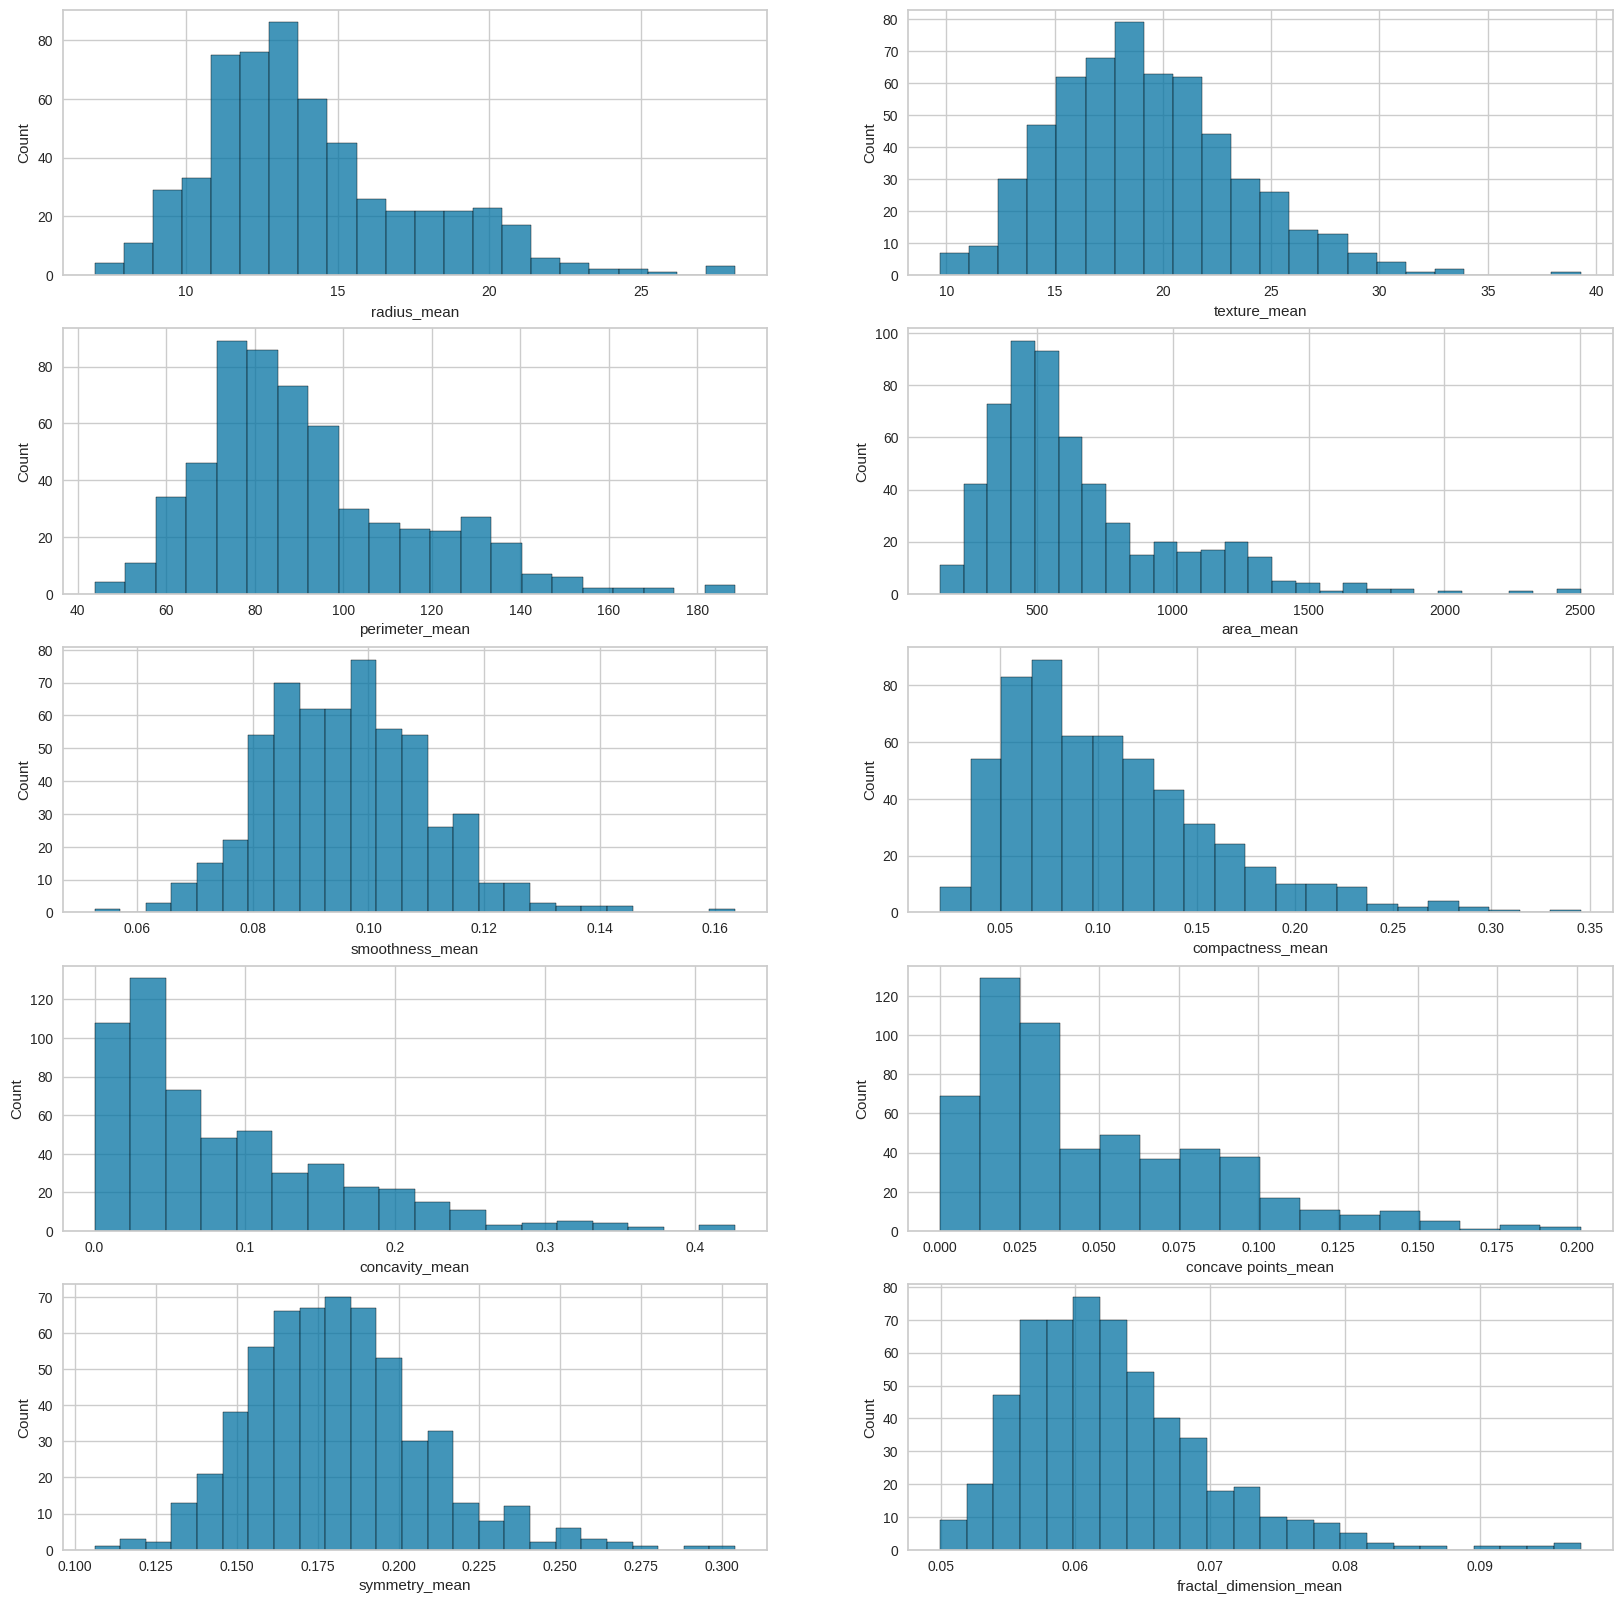

In [21]:
plt.figure(figsize = (20, 20))

plt.subplot(5, 2, 1)
sns.histplot(x = df['radius_mean'], kde = False)

plt.subplot(5, 2, 2)
sns.histplot(x = df['texture_mean'], kde = False)

plt.subplot(5, 2, 3)
sns.histplot(x = df['perimeter_mean'], kde = False)

plt.subplot(5, 2, 4)
sns.histplot(x = df['area_mean'], kde = False)

plt.subplot(5, 2, 5)
sns.histplot(x = df['smoothness_mean'], kde = False)

plt.subplot(5, 2, 6)
sns.histplot(x = df['compactness_mean'], kde = False)

plt.subplot(5, 2, 7)
sns.histplot(x = df['concavity_mean'], kde = False)

plt.subplot(5, 2, 8)
sns.histplot(x = df['concave points_mean'], kde = False)

plt.subplot(5, 2, 9)
sns.histplot(x = df['symmetry_mean'], kde = False)

plt.subplot(5, 2, 10)
sns.histplot(x = df['fractal_dimension_mean'], kde = False)

<AxesSubplot: xlabel='fractal_dimension_se', ylabel='Count'>

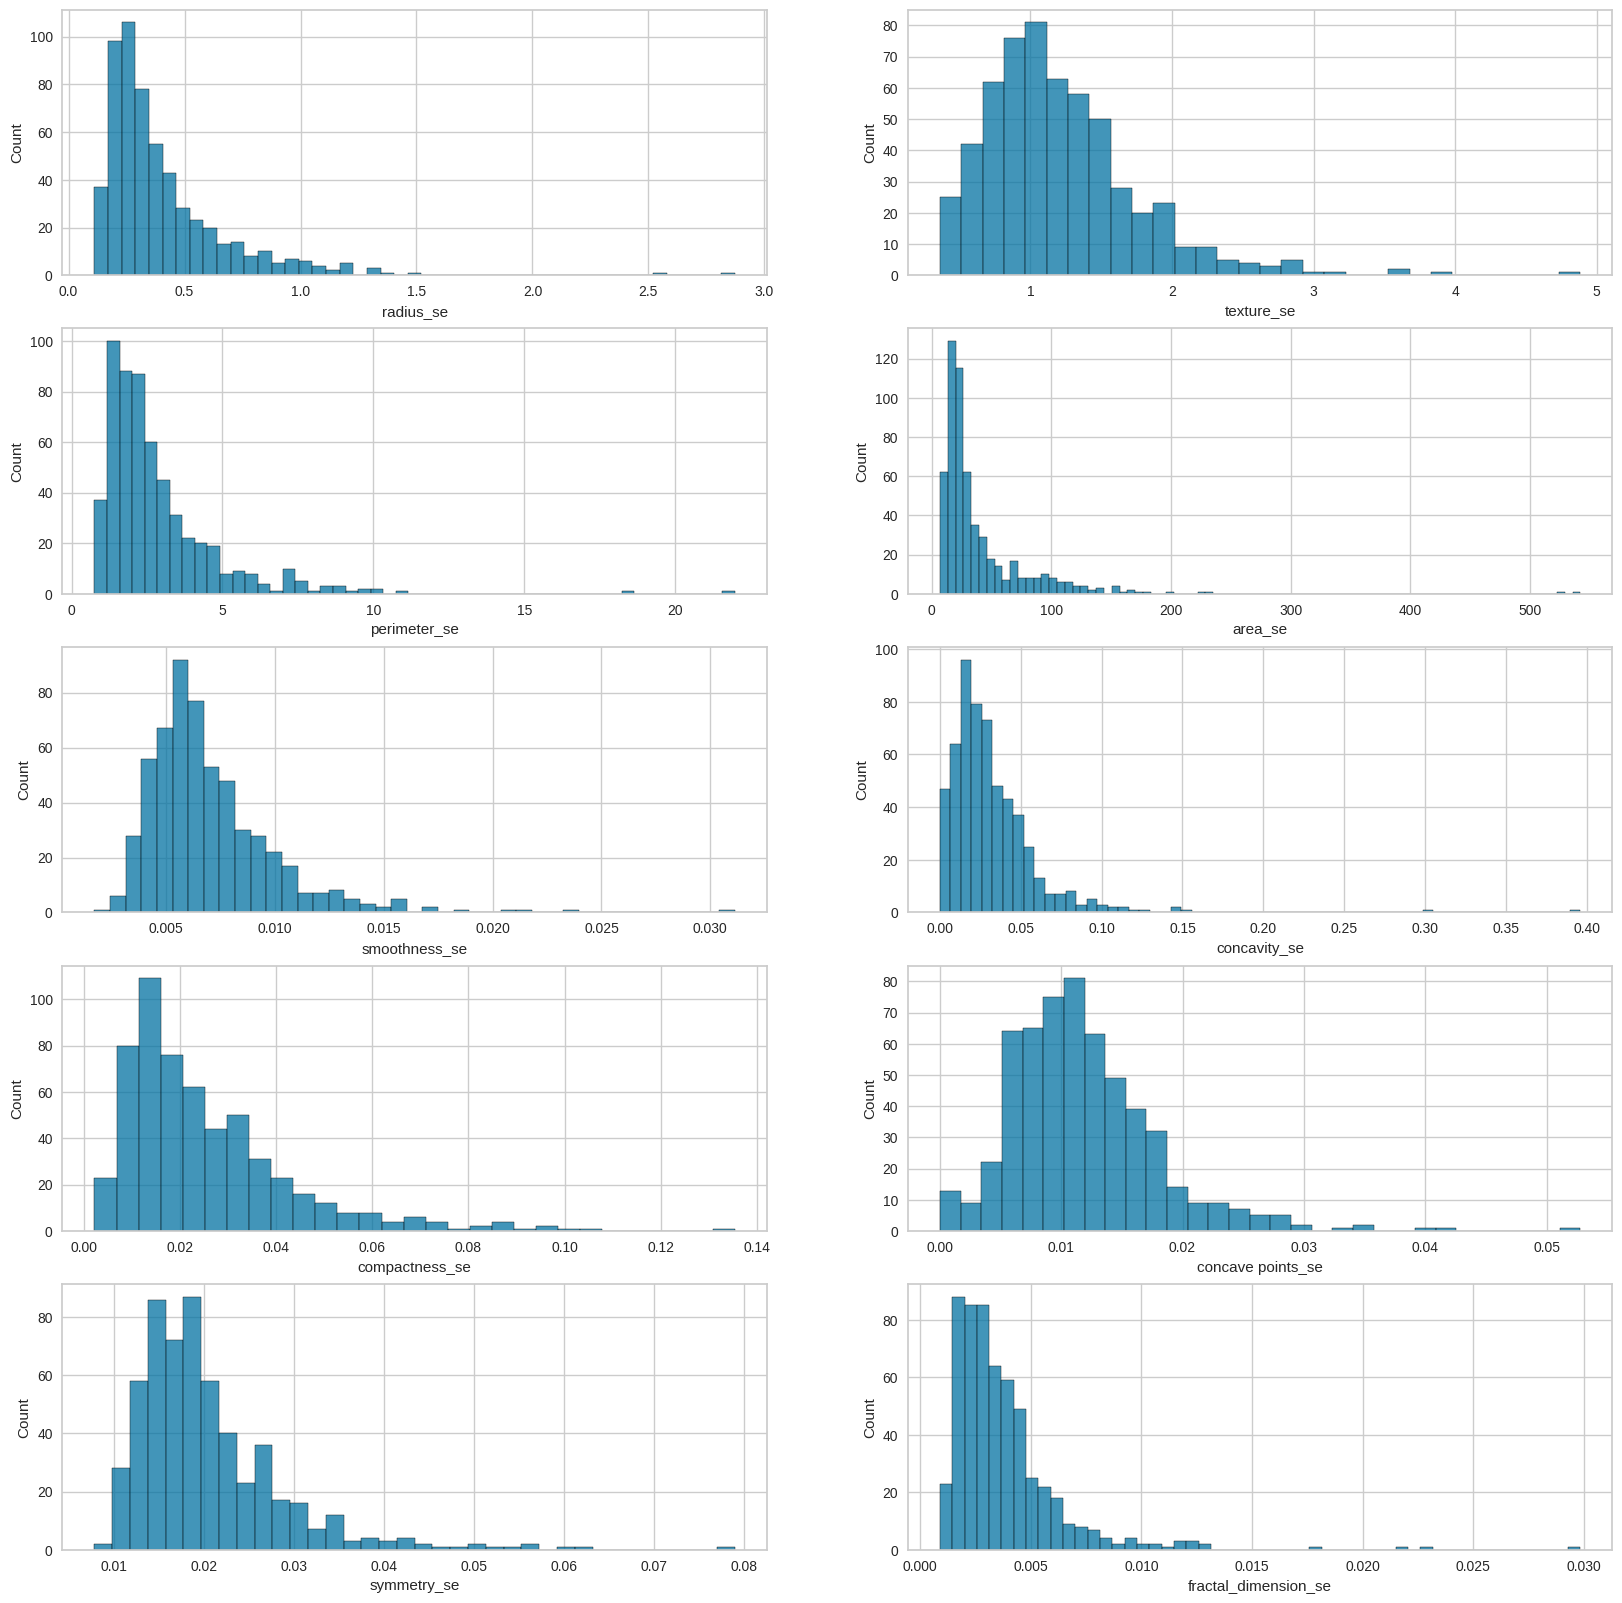

In [22]:
plt.figure(figsize = (20, 20))

plt.subplot(5, 2, 1)
sns.histplot(x = df['radius_se'], kde = False)

plt.subplot(5, 2, 2)
sns.histplot(x = df['texture_se'], kde = False)

plt.subplot(5, 2, 3)
sns.histplot(x = df['perimeter_se'], kde = False)

plt.subplot(5, 2, 4)
sns.histplot(x = df['area_se'], kde = False)

plt.subplot(5, 2, 5)
sns.histplot(x = df['smoothness_se'], kde = False)

plt.subplot(5, 2, 6)
sns.histplot(x = df['concavity_se'], kde = False)

plt.subplot(5, 2, 7)
sns.histplot(x = df['compactness_se'], kde = False)

plt.subplot(5, 2, 8)
sns.histplot(x = df['concave points_se'], kde = False)

plt.subplot(5, 2, 9)
sns.histplot(x = df['symmetry_se'], kde = False)

plt.subplot(5, 2, 10)
sns.histplot(x = df['fractal_dimension_se'], kde = False)

<AxesSubplot: xlabel='fractal_dimension_worst', ylabel='Count'>

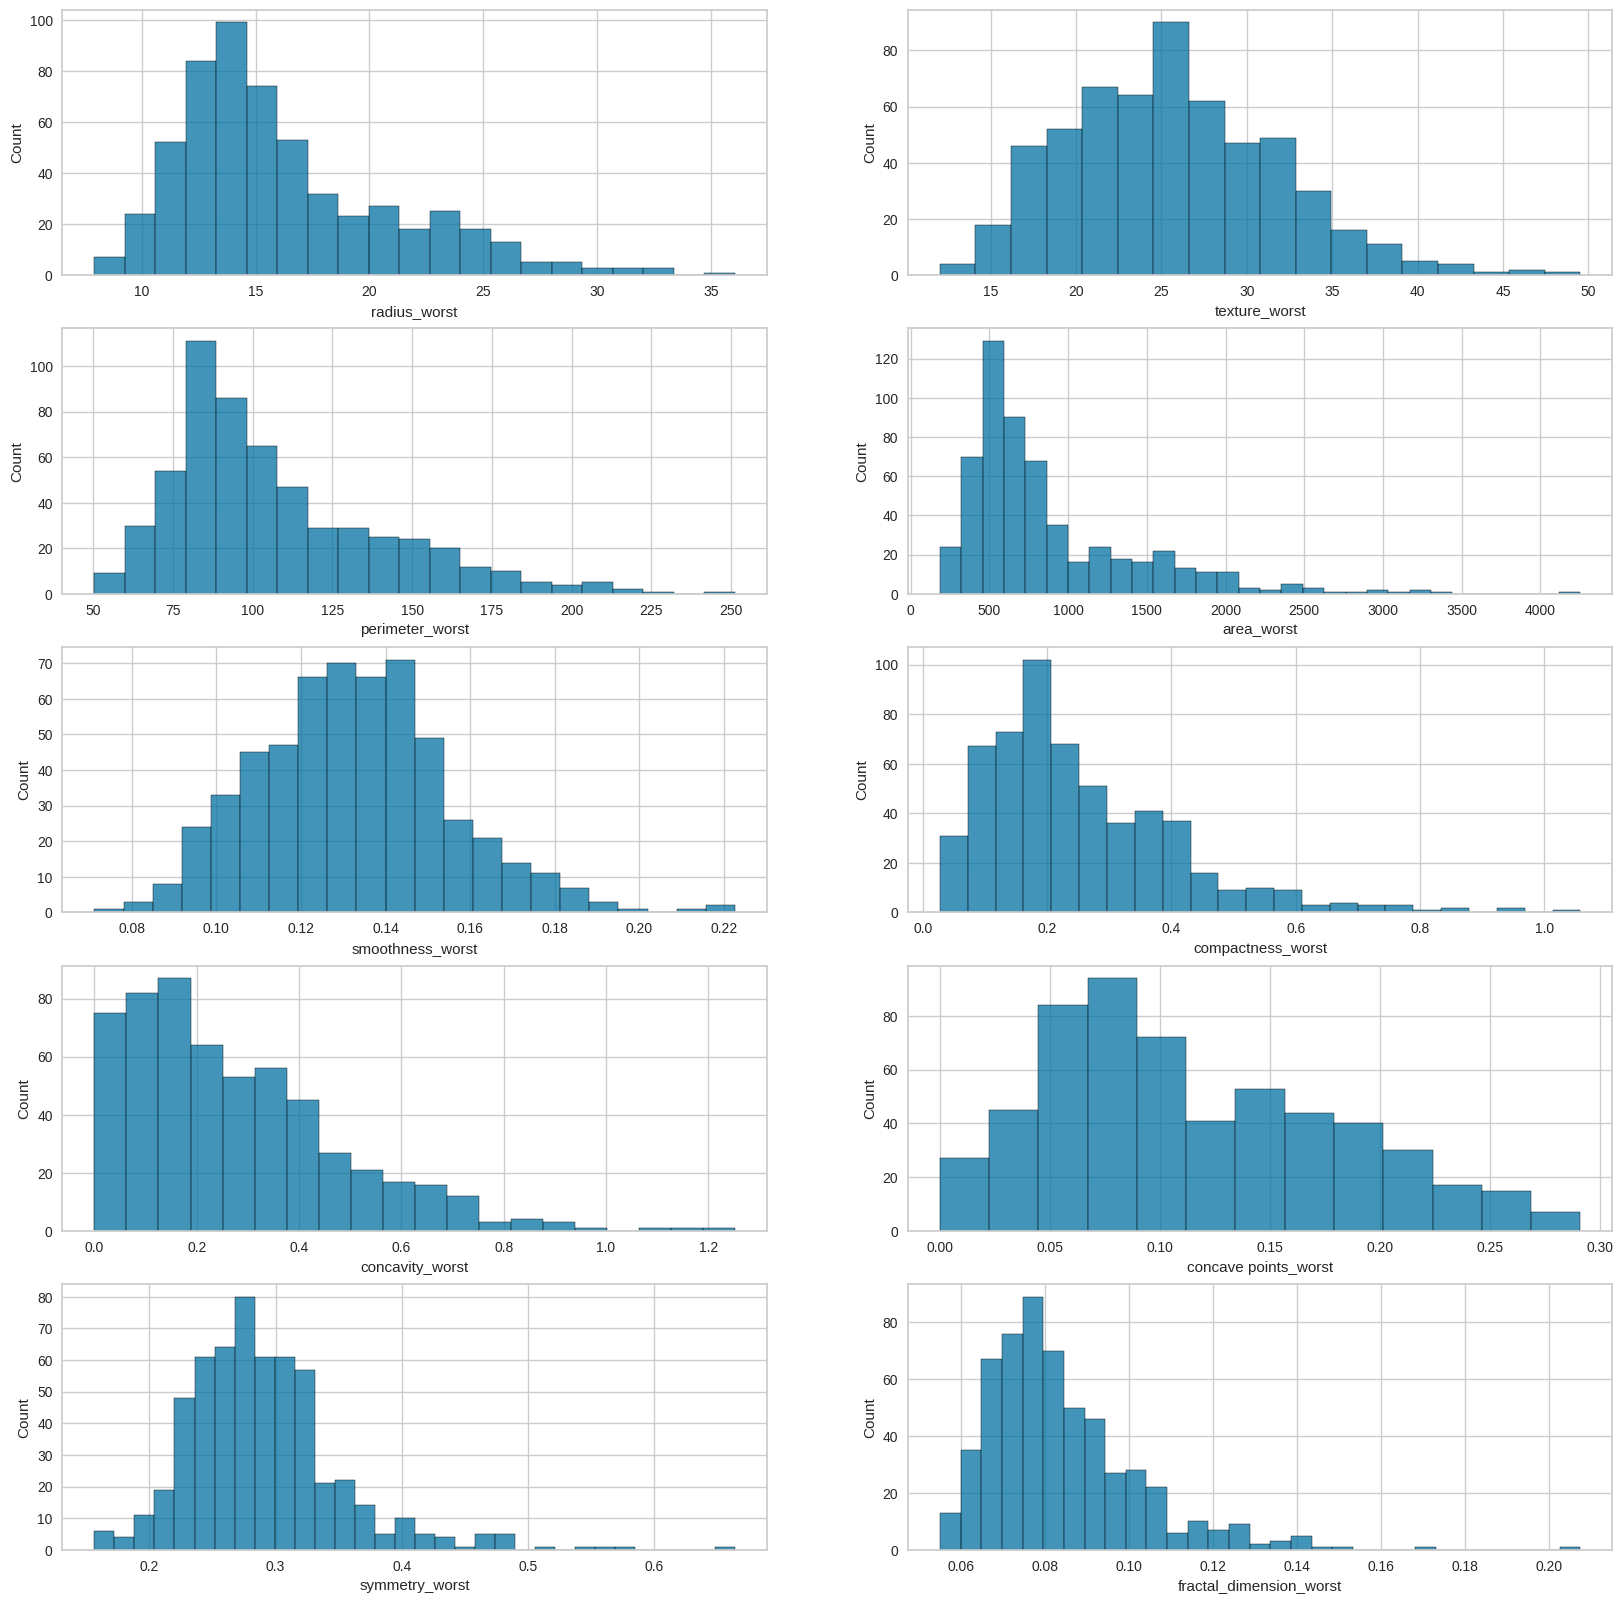

In [23]:
plt.figure(figsize = (20, 20))

plt.subplot(5, 2, 1)
sns.histplot(x = df['radius_worst'], kde = False)

plt.subplot(5, 2, 2)
sns.histplot(x = df['texture_worst'], kde = False)

plt.subplot(5, 2, 3)
sns.histplot(x = df['perimeter_worst'], kde = False)

plt.subplot(5, 2, 4)
sns.histplot(x = df['area_worst'], kde = False)

plt.subplot(5, 2, 5)
sns.histplot(x = df['smoothness_worst'], kde = False)

plt.subplot(5, 2, 6)
sns.histplot(x = df['compactness_worst'], kde = False)

plt.subplot(5, 2, 7)
sns.histplot(x = df['concavity_worst'], kde = False)

plt.subplot(5, 2, 8)
sns.histplot(x = df['concave points_worst'], kde = False)

plt.subplot(5, 2, 9)
sns.histplot(x = df['symmetry_worst'], kde = False)

plt.subplot(5, 2, 10)
sns.histplot(x = df['fractal_dimension_worst'], kde = False)

In [28]:
features_mean  = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
features_se    = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']
features_wrost = ['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

<AxesSubplot: xlabel='diagnosis', ylabel='fractal_dimension_mean'>

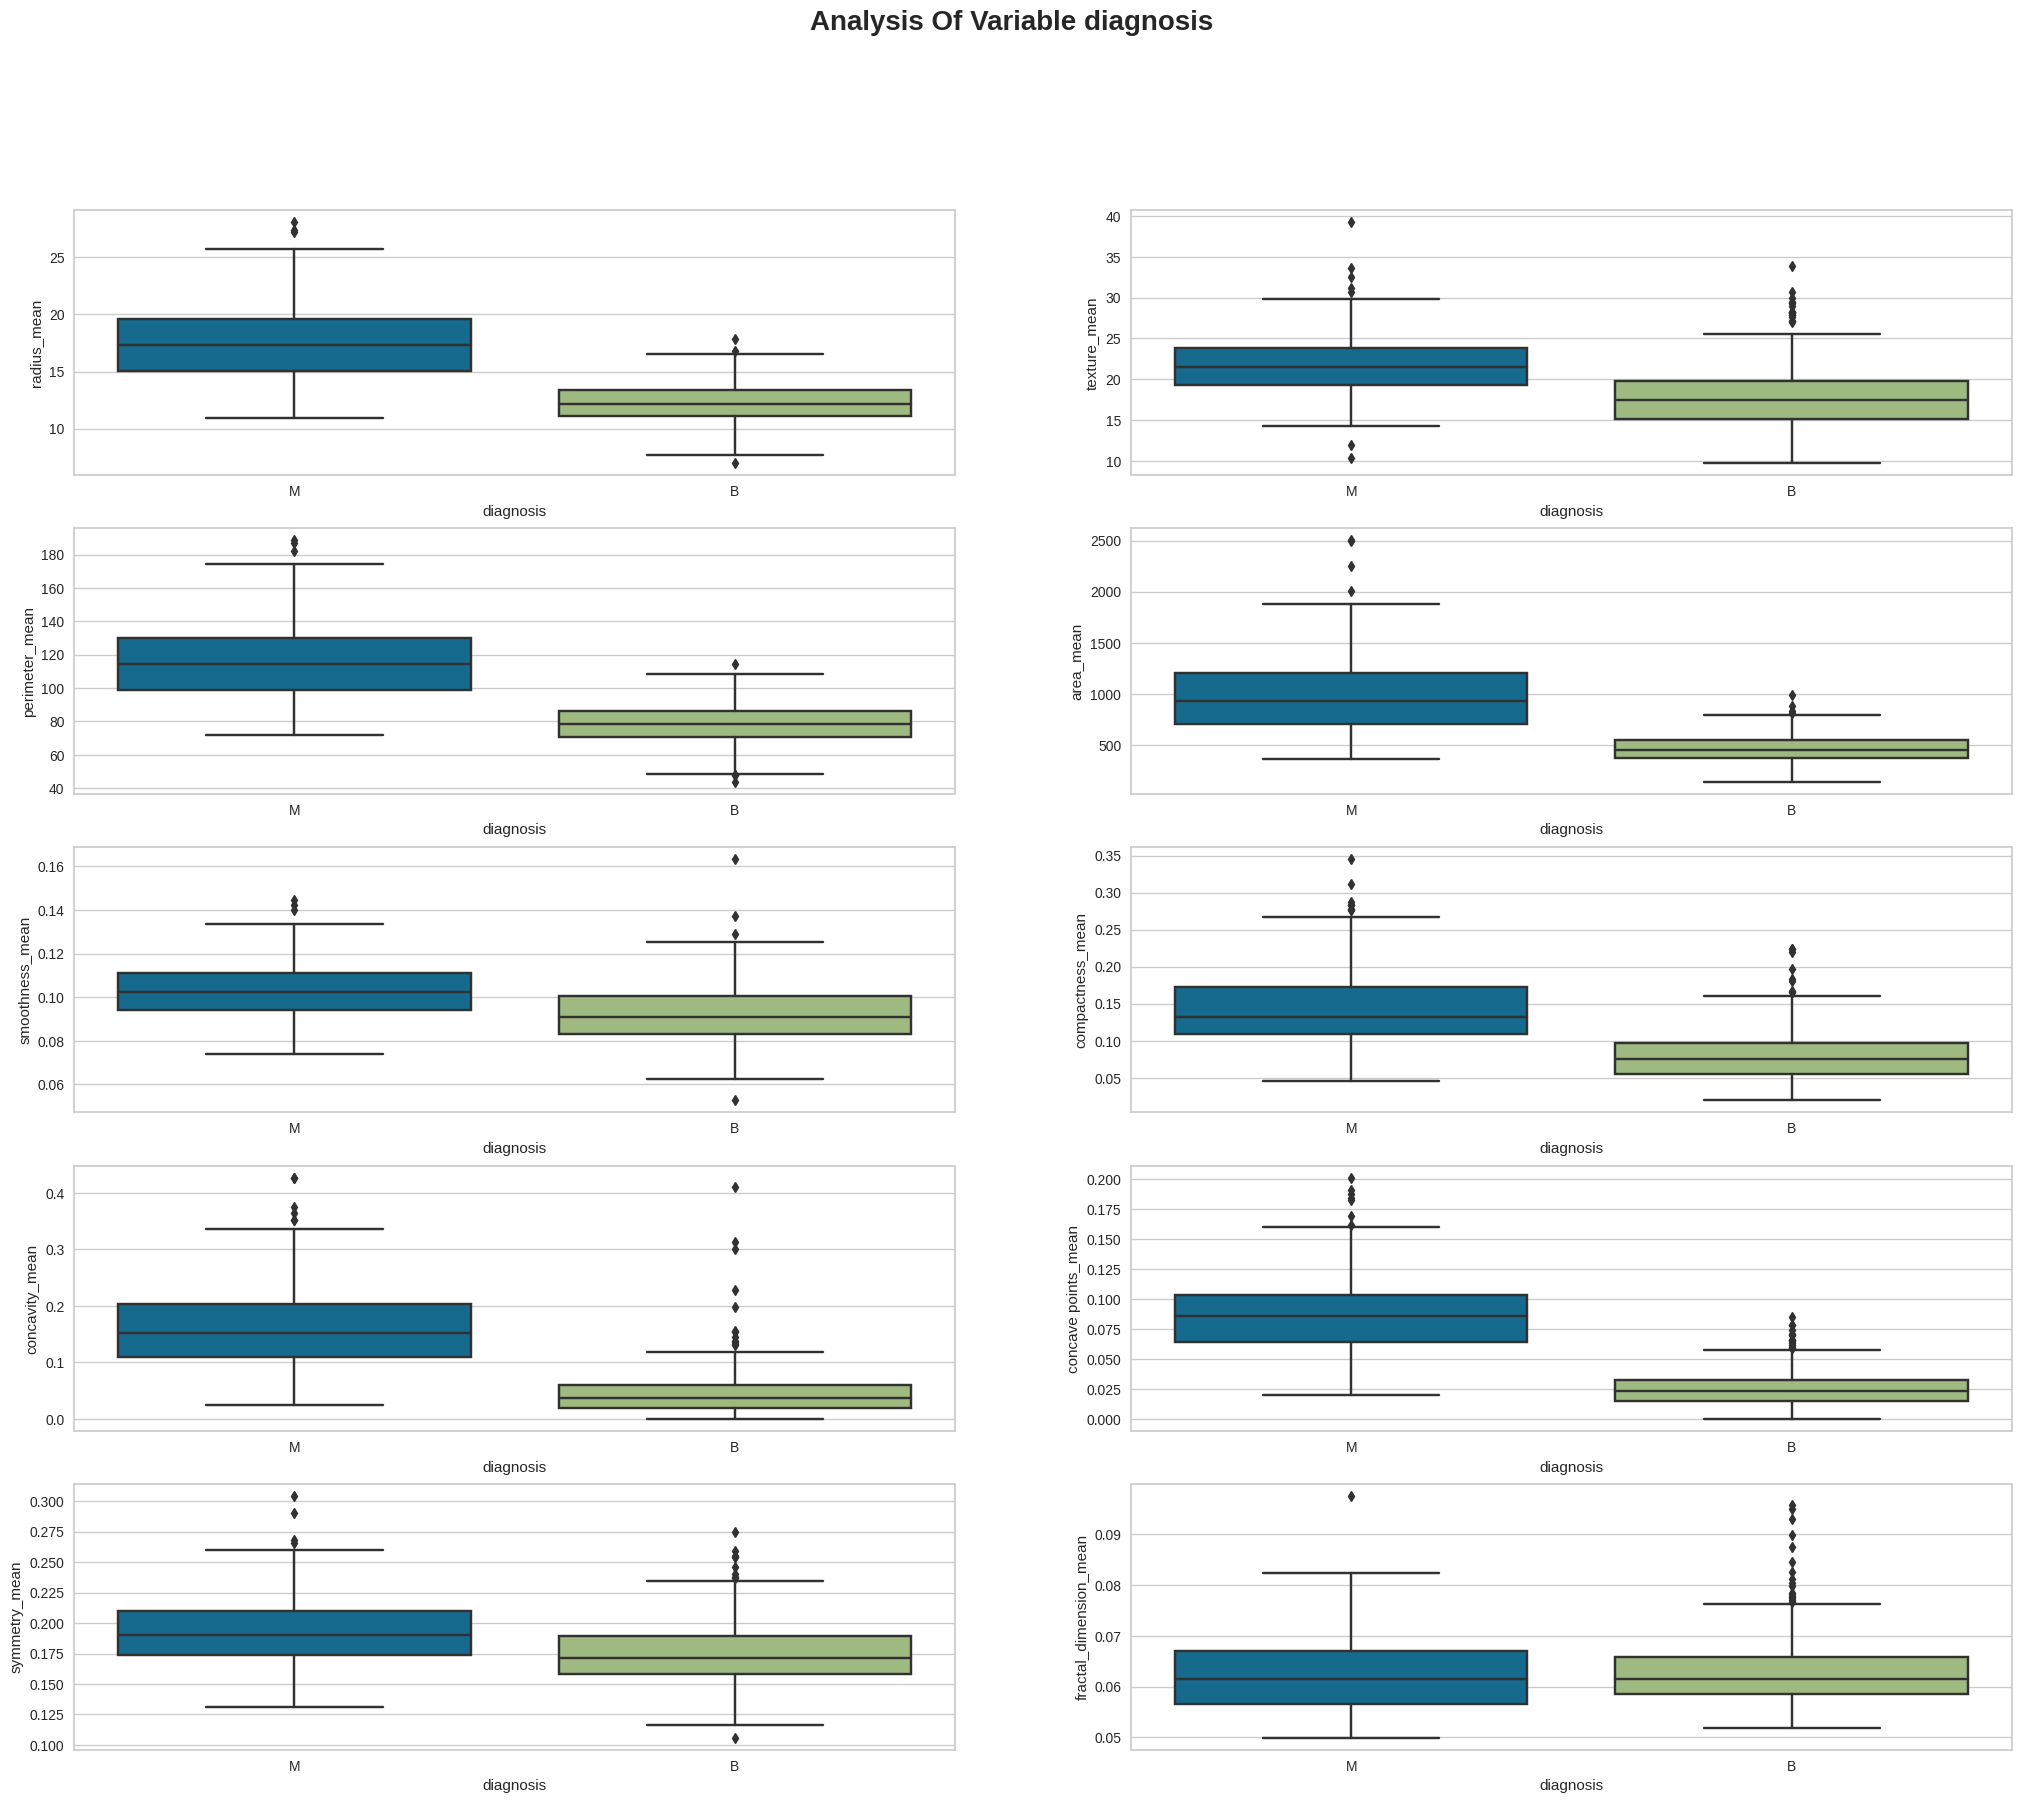

In [24]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable diagnosis",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.boxplot(x="diagnosis", y="radius_mean", data=df)

plt.subplot(5,2,2)
sns.boxplot(x="diagnosis", y="texture_mean", data=df)

plt.subplot(5,2,3)
sns.boxplot(x="diagnosis", y="perimeter_mean", data=df)

plt.subplot(5,2,4)
sns.boxplot(x="diagnosis", y="area_mean", data=df)

plt.subplot(5,2,5)
sns.boxplot(x="diagnosis", y="smoothness_mean", data=df)

plt.subplot(5,2,6)
sns.boxplot(x="diagnosis", y="compactness_mean", data=df)

plt.subplot(5,2,7)
sns.boxplot(x="diagnosis", y="concavity_mean", data=df)

plt.subplot(5,2,8)
sns.boxplot(x="diagnosis", y="concave points_mean", data=df)

plt.subplot(5,2,9)
sns.boxplot(x="diagnosis", y="symmetry_mean", data=df)

plt.subplot(5,2,10)
sns.boxplot(x="diagnosis", y="fractal_dimension_mean", data=df)

<AxesSubplot: xlabel='diagnosis', ylabel='fractal_dimension_se'>

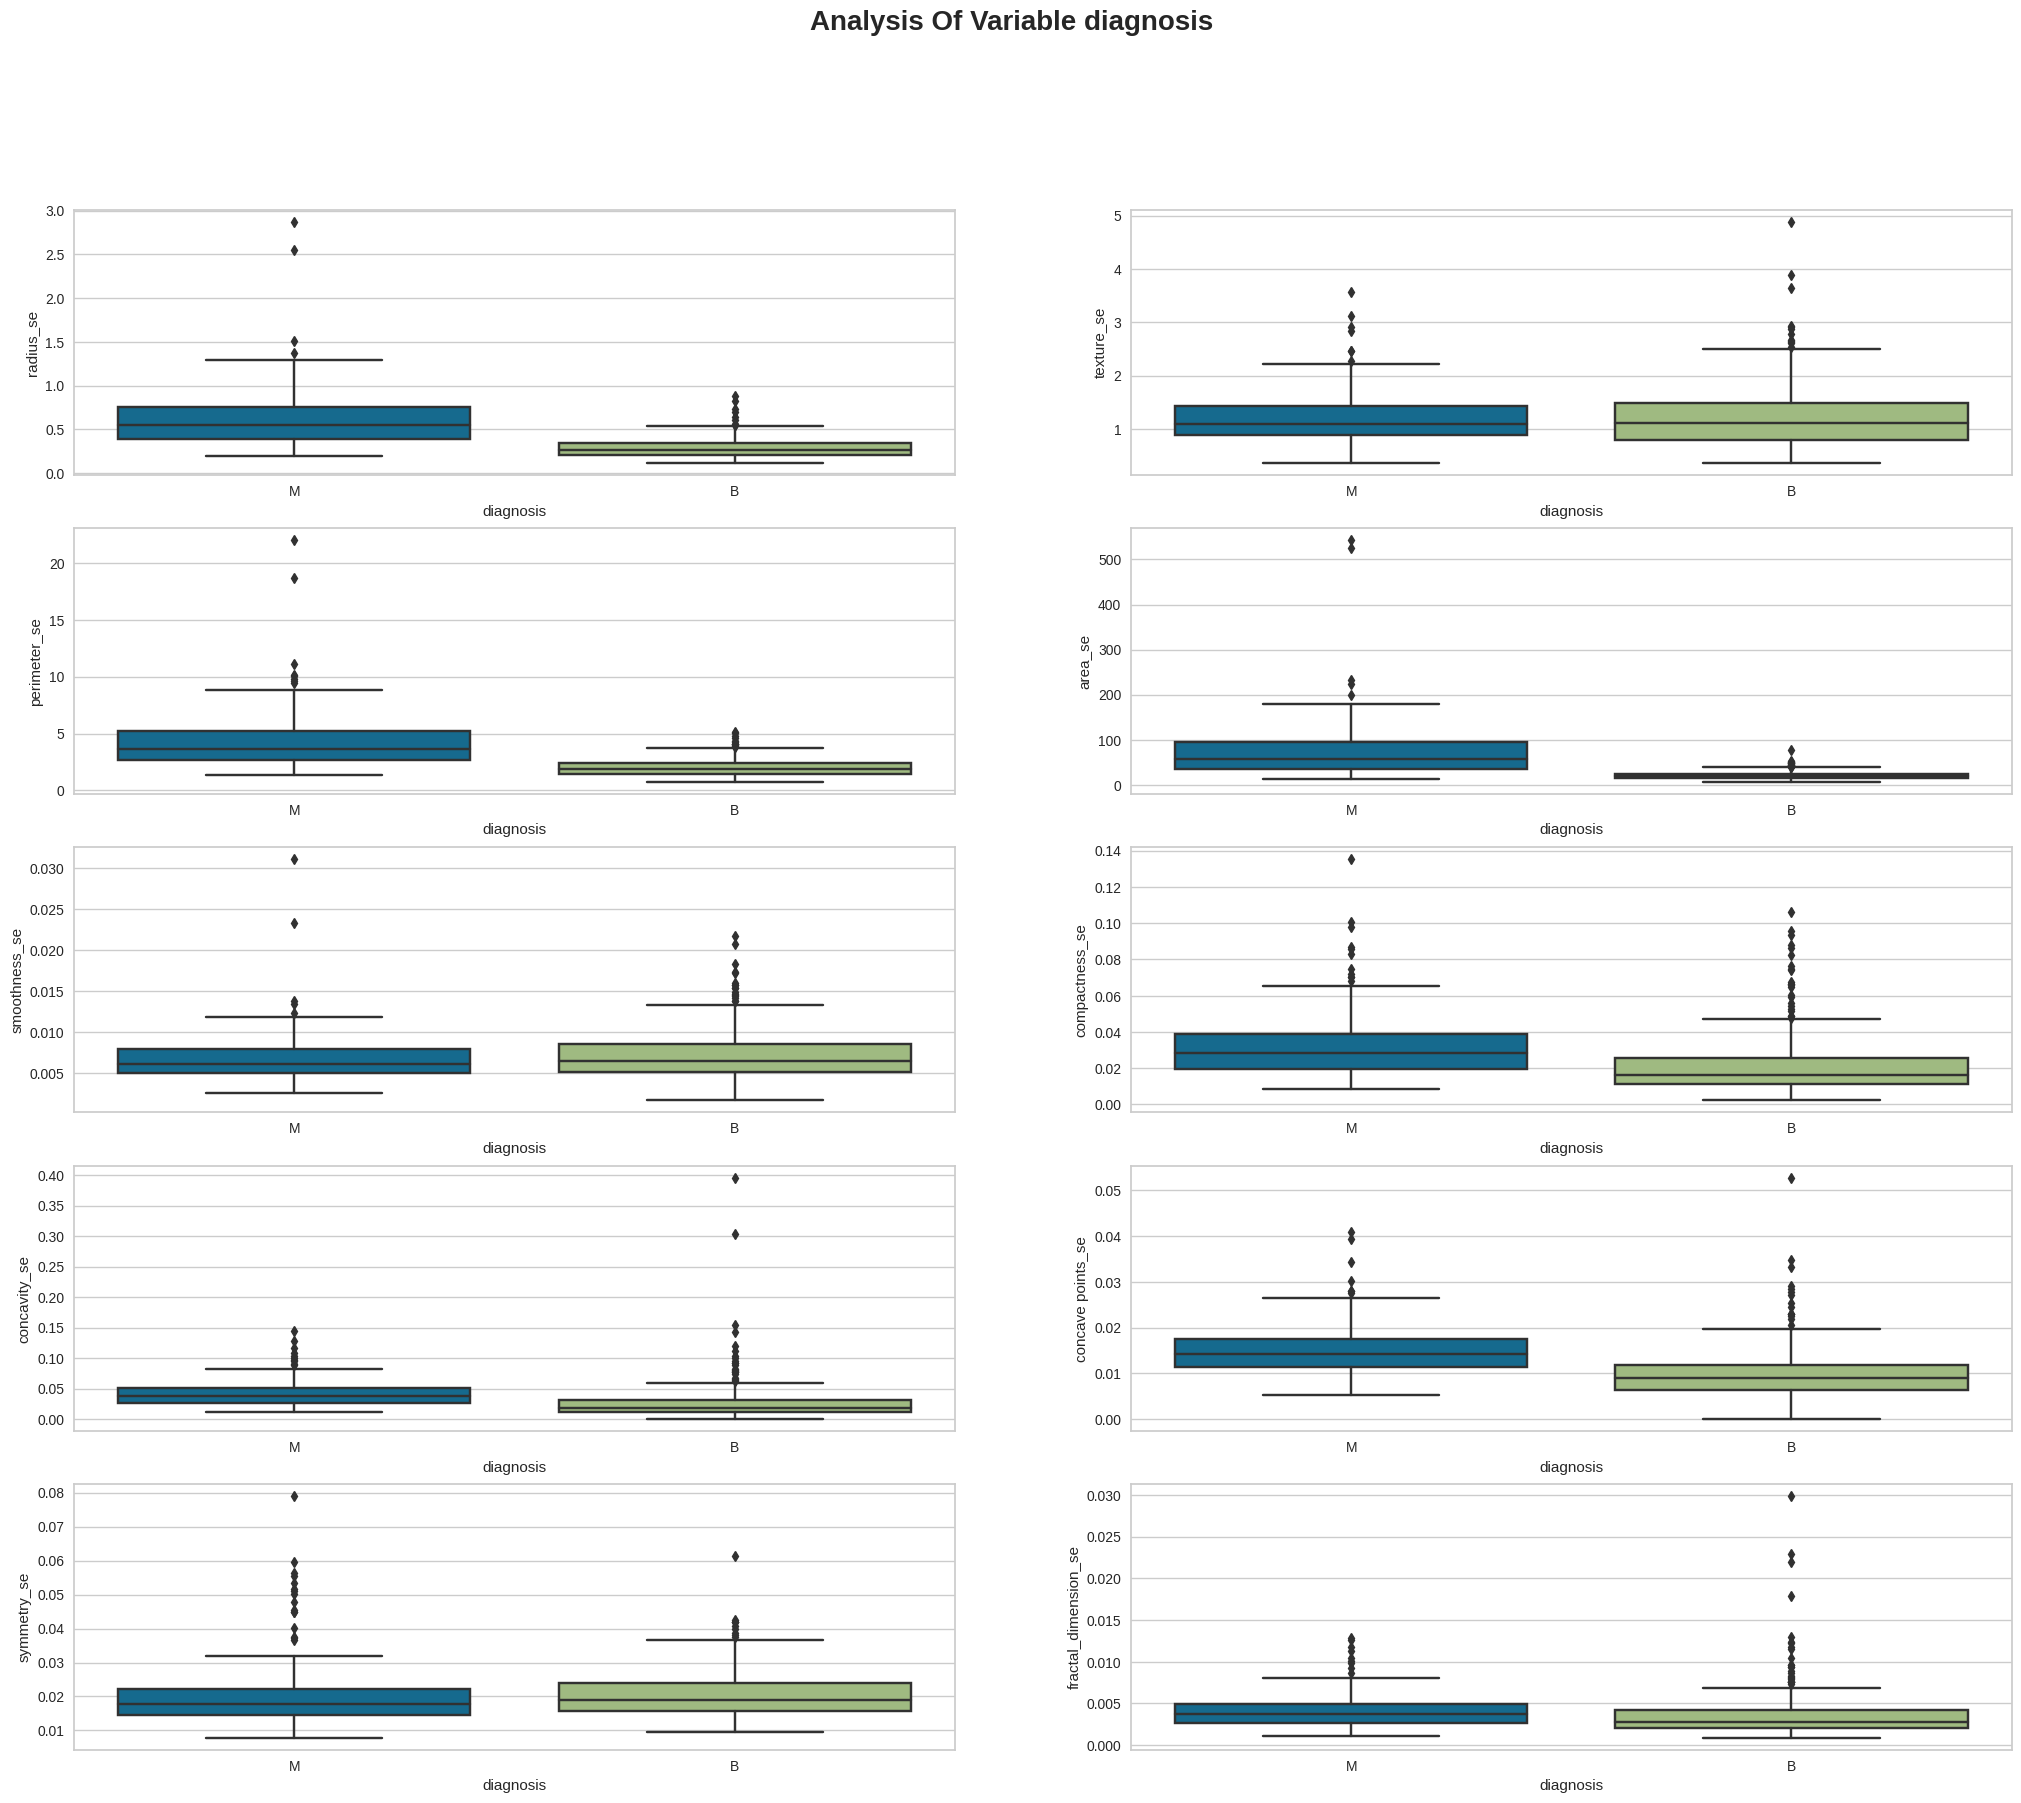

In [25]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable diagnosis",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.boxplot(x="diagnosis", y="radius_se", data=df)

plt.subplot(5,2,2)
sns.boxplot(x="diagnosis", y="texture_se", data=df)

plt.subplot(5,2,3)
sns.boxplot(x="diagnosis", y="perimeter_se", data=df)

plt.subplot(5,2,4)
sns.boxplot(x="diagnosis", y="area_se", data=df)

plt.subplot(5,2,5)
sns.boxplot(x="diagnosis", y="smoothness_se", data=df)

plt.subplot(5,2,6)
sns.boxplot(x="diagnosis", y="compactness_se", data=df)

plt.subplot(5,2,7)
sns.boxplot(x="diagnosis", y="concavity_se", data=df)

plt.subplot(5,2,8)
sns.boxplot(x="diagnosis", y="concave points_se", data=df)

plt.subplot(5,2,9)
sns.boxplot(x="diagnosis", y="symmetry_se", data=df)

plt.subplot(5,2,10)
sns.boxplot(x="diagnosis", y="fractal_dimension_se", data=df)

<AxesSubplot: xlabel='diagnosis', ylabel='fractal_dimension_worst'>

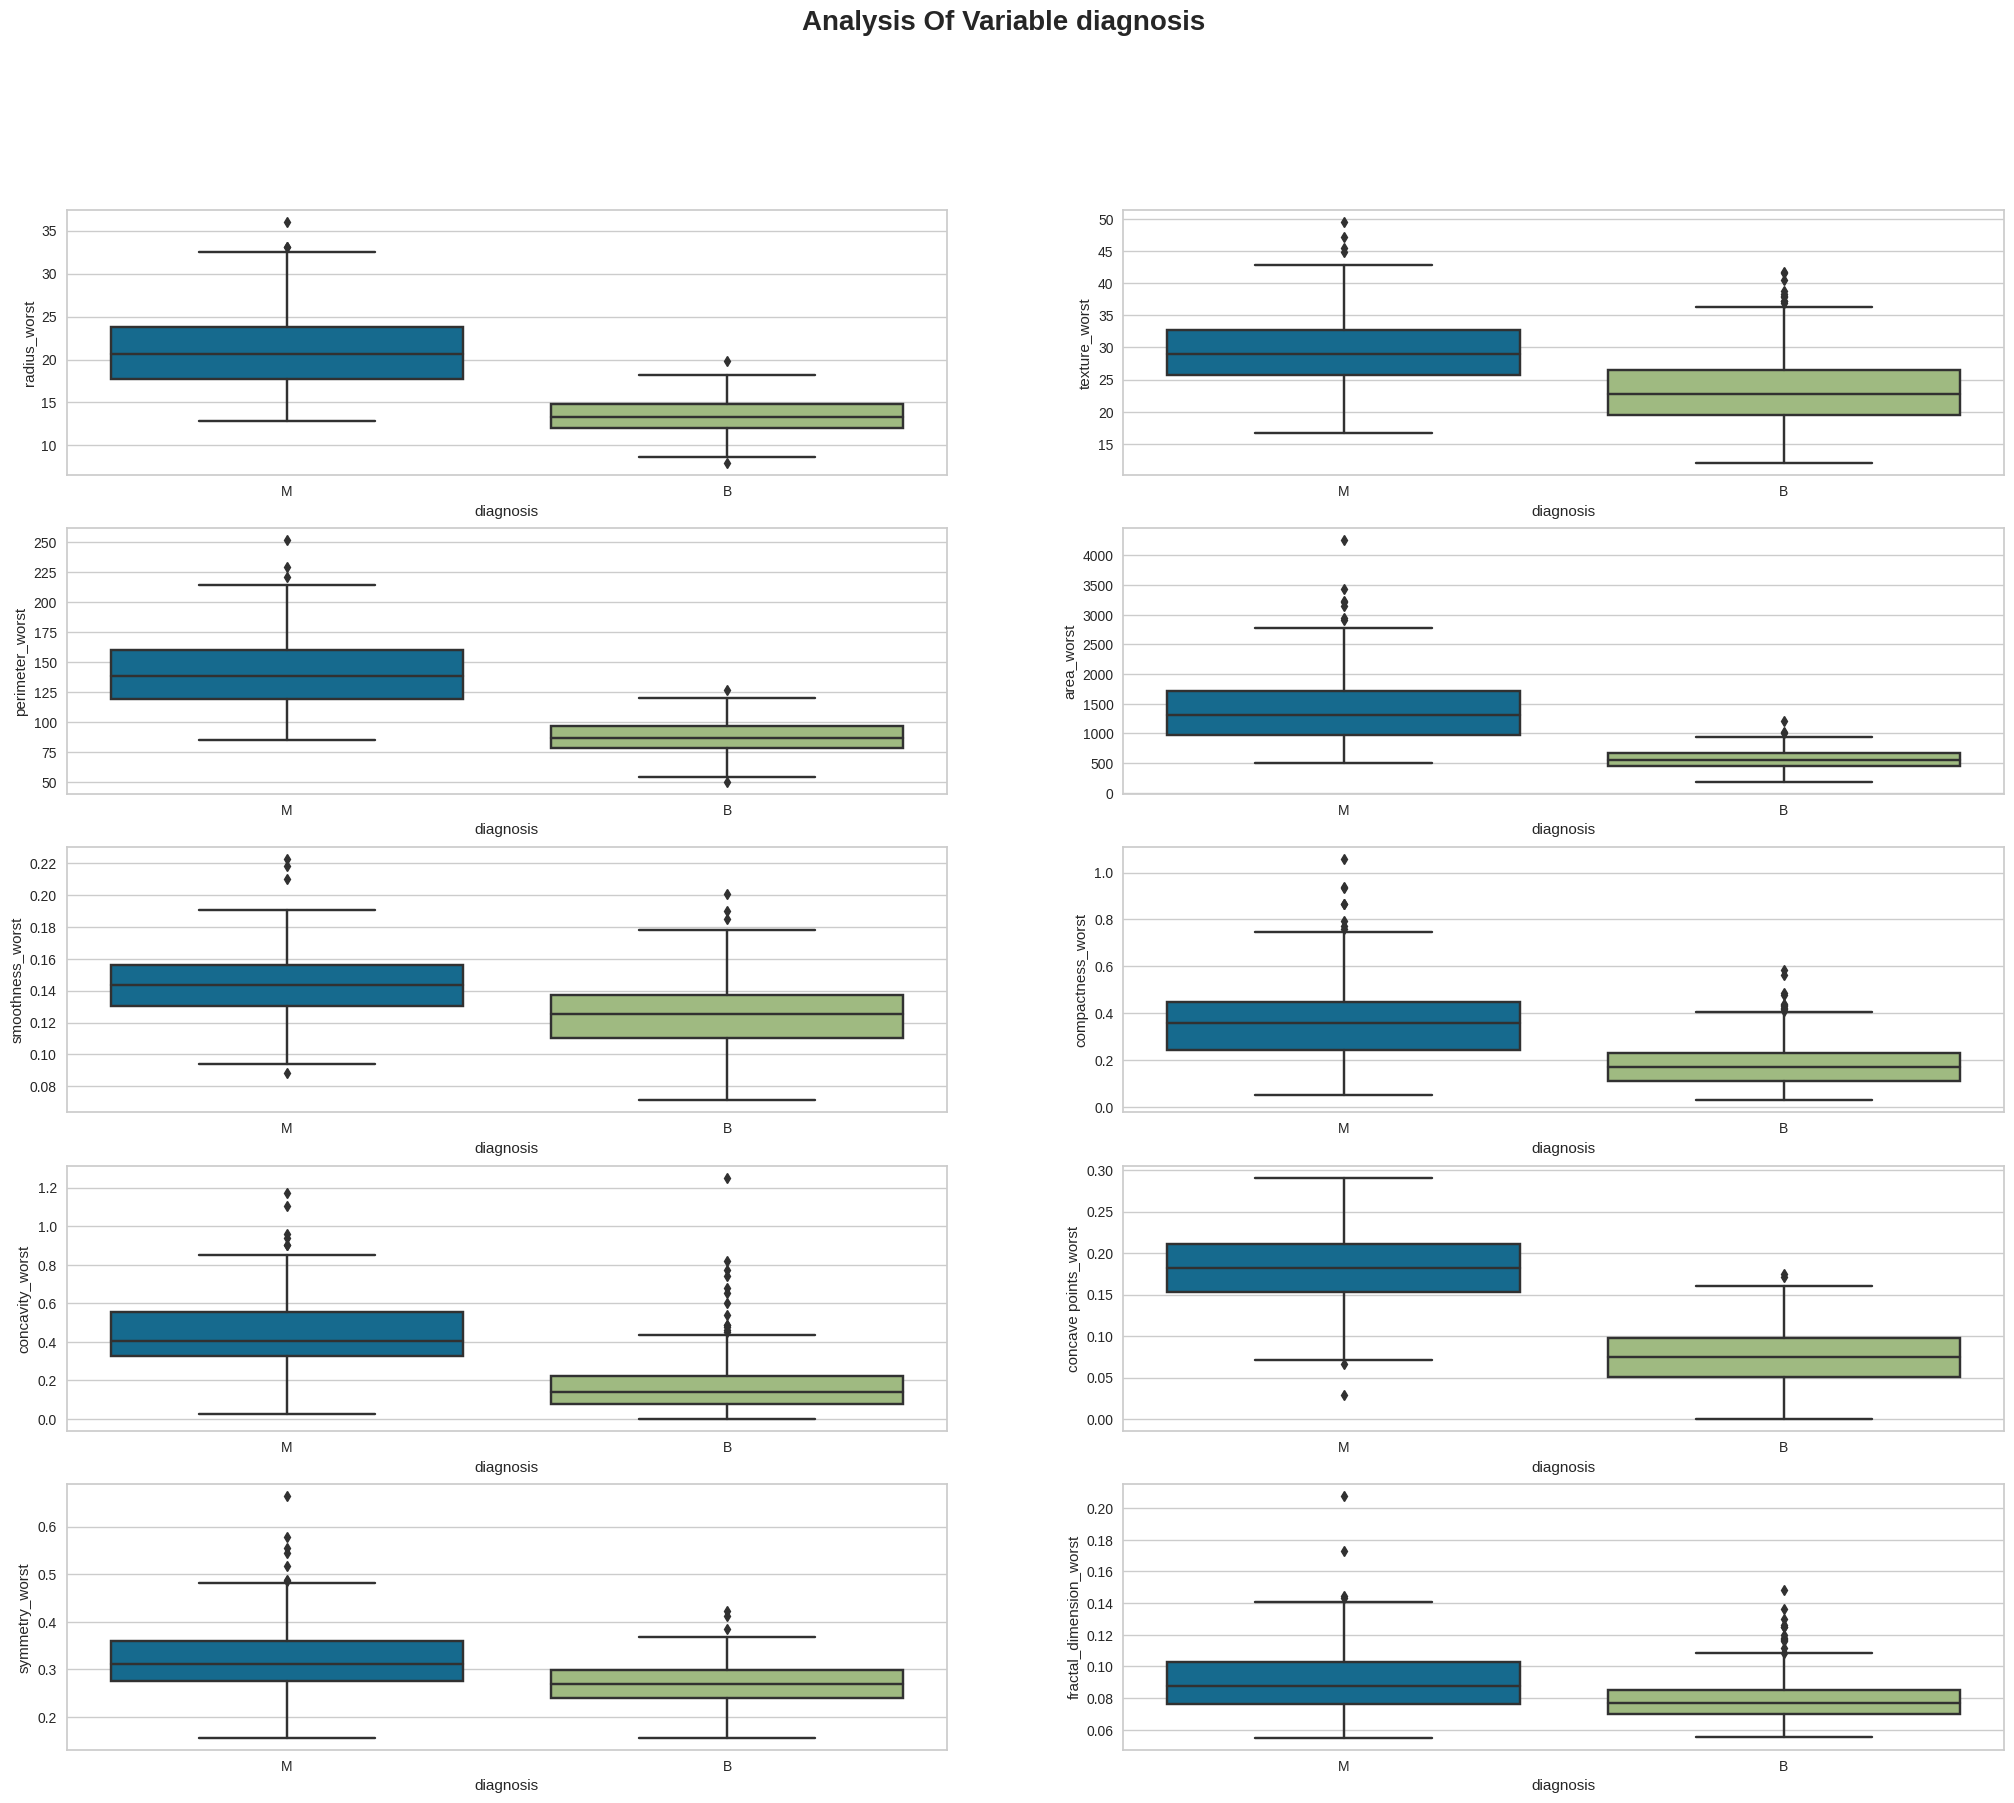

In [26]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable diagnosis",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.boxplot(x="diagnosis", y="radius_worst", data=df)

plt.subplot(5,2,2)
sns.boxplot(x="diagnosis", y="texture_worst", data=df)

plt.subplot(5,2,3)
sns.boxplot(x="diagnosis", y="perimeter_worst", data=df)

plt.subplot(5,2,4)
sns.boxplot(x="diagnosis", y="area_worst", data=df)

plt.subplot(5,2,5)
sns.boxplot(x="diagnosis", y="smoothness_worst", data=df)

plt.subplot(5,2,6)
sns.boxplot(x="diagnosis", y="compactness_worst", data=df)

plt.subplot(5,2,7)
sns.boxplot(x="diagnosis", y="concavity_worst", data=df)

plt.subplot(5,2,8)
sns.boxplot(x="diagnosis", y="concave points_worst", data=df)

plt.subplot(5,2,9)
sns.boxplot(x="diagnosis", y="symmetry_worst", data=df)

plt.subplot(5,2,10)
sns.boxplot(x="diagnosis", y="fractal_dimension_worst", data=df)

## Features encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder_diagnosis = LabelEncoder()

df['diagnosis'] = label_encoder_diagnosis.fit_transform(df['diagnosis'])

In [43]:
X = df.drop('diagnosis', axis = 1)
X = X.values
y = df['diagnosis']

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

### Decision tree

In [46]:
parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = DecisionTreeClassifier()
gridDecisionTree = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridDecisionTree.fit(X_train, y_train)

print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Depth: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  5
Max Nvl:  5
Algorithm:  entropy
Score:  0.9271474139895193


0.935672514619883

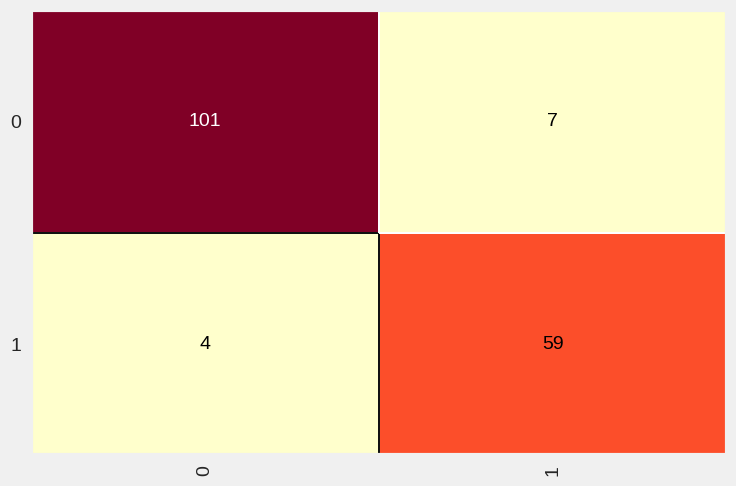

In [48]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 5, max_depth= 5, random_state=0)
decision_tree.fit(X_train, y_train)
previsoes = decision_tree.predict(X_test)

cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [49]:
classification_decision = (classification_report(y_test, previsoes))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       108
           1       0.89      0.94      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



Find the most importants features

In [50]:
columns = df.drop('diagnosis', axis = 1).columns
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

concave points_worst       0.634096
perimeter_worst            0.164515
texture_worst              0.075367
smoothness_worst           0.024739
symmetry_mean              0.024223
symmetry_se                0.023212
radius_se                  0.022650
fractal_dimension_mean     0.016349
texture_mean               0.014847
compactness_worst          0.000000
area_worst                 0.000000
concave points_se          0.000000
concavity_worst            0.000000
symmetry_worst             0.000000
radius_worst               0.000000
fractal_dimension_se       0.000000
radius_mean                0.000000
compactness_se             0.000000
concavity_se               0.000000
smoothness_se              0.000000
area_se                    0.000000
perimeter_se               0.000000
texture_se                 0.000000
concave points_mean        0.000000
concavity_mean             0.000000
compactness_mean           0.000000
smoothness_mean            0.000000
area_mean                  0